In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras


#The CIFAR-10 dataset consists of 60000 32x32
#colour images in 10 classes, with 6000 images per class.
#There are 50000 training images and 10000 test images. 
#labels=[airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck]

In [2]:
(train_x,train_y),(test_x,test_y) =tf.keras.datasets.cifar10.load_data()

In [3]:
train_x.shape

(50000, 32, 32, 3)

array([[ 59,  62,  63],
       [ 43,  46,  45],
       [ 50,  48,  43],
       [ 68,  54,  42],
       [ 98,  73,  52],
       [119,  91,  63],
       [139, 107,  75],
       [145, 110,  80],
       [149, 117,  89],
       [149, 120,  93],
       [131, 103,  77],
       [125,  99,  76],
       [142, 115,  91],
       [144, 112,  86],
       [137, 105,  79],
       [129,  97,  71],
       [137, 106,  79],
       [134, 106,  76],
       [124,  97,  64],
       [139, 113,  78],
       [139, 112,  75],
       [133, 105,  69],
       [136, 105,  74],
       [139, 108,  77],
       [152, 120,  89],
       [163, 131, 100],
       [168, 136, 108],
       [159, 129, 102],
       [158, 130, 104],
       [158, 132, 108],
       [152, 125, 102],
       [148, 124, 103]], dtype=uint8)

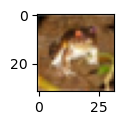

In [4]:
plt.figure(figsize=(10,1))
plt.imshow(train_x[0])

In [5]:
#lets check for index 0 what is our given output
print(train_y[0])

[6]


In [6]:
train_y.shape

(50000, 1)

In [7]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(len(classes))

10


In [8]:
print(classes[train_y[0][0]])

frog


Text(0.5, 1.0, 'automobile')

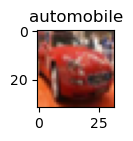

In [9]:
plt.figure(figsize=(10,1))
plt.imshow(train_x[5])
plt.title(classes[train_y[5][0]])

In [10]:
#see we can't scale our output because it is our label 
x_trian_scaled=train_x/255
x_test_scaled=test_x/255


In [11]:
#lets create one hot encoding for our classes/label/output
#there is an api in keras 
print(train_y[:5])
y_train_scaled=keras.utils.to_categorical(train_y,num_classes=10,dtype='float32')
print('converting useing one hot encoding')
y_train_scaled[:5]

[[6]
 [9]
 [9]
 [4]
 [1]]
converting useing one hot encoding


array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
#lets create our model
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
 
])

model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_trian_scaled,y_train_scaled,epochs=5)



Epoch 1/5
1563/1563 [==============================] - 124s 78ms/step - loss: 1.8109 - accuracy: 0.3567
Epoch 2/5
1563/1563 [==============================] - 117s 75ms/step - loss: 1.6242 - accuracy: 0.4275
Epoch 3/5
1563/1563 [==============================] - 112s 72ms/step - loss: 1.5418 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 115s 73ms/step - loss: 1.4832 - accuracy: 0.4795
Epoch 5/5
1563/1563 [==============================] - 116s 74ms/step - loss: 1.4328 - accuracy: 0.4963


In [13]:
predicted_y=model.predict(x_test_scaled)
#lets check for 0th index
print(np.argmax(predicted_y[0]))
classes[test_y[0][0]]



313/313 [==============================] - 6s 18ms/step
3


'cat'

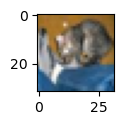

In [14]:
plt.figure(figsize=(10,1))
plt.imshow(test_x[0])

In [15]:
y_test_scaled=keras.utils.to_categorical(test_y,num_classes=10,dtype='float32')


In [16]:
%%timeit -n1 -r1
model.evaluate(x_test_scaled,y_test_scaled)

313/313 [==============================] - 6s 19ms/step - loss: 1.4801 - accuracy: 0.4810
6.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [29]:
import pickle
pickle.dump(model,open('/Users/ashutoshpathak/Desktop/deepl/model_save','wb'))

** lets use CNN for our model

In [18]:
import warnings
warnings.filterwarnings("ignore", message=".*Your Warning Message Here.*")
import keras
from keras import datasets
from keras import layers
from keras import models


#from tensorflow.keras import datasets
#from tensorflow.keras import datasets,layers,models
#lets create our model using cnn
model=models.Sequential([
    
    layers.Conv2D(32,3,padding='same',activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(32,3,activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(20,activation='relu'),
    layers.Dense(10,activation='softmax')
 
])




In [19]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_trian_scaled,y_train_scaled,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 54s 34ms/step - loss: 1.6278 - accuracy: 0.3977
Epoch 2/5
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2640 - accuracy: 0.5435
Epoch 3/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.1235 - accuracy: 0.6016
Epoch 4/5
1563/1563 [==============================] - 52s 34ms/step - loss: 1.0437 - accuracy: 0.6297
Epoch 5/5
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9889 - accuracy: 0.6502


In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_3 (Dense)             (None, 20)               

In [21]:
cnn_predicted=model.predict(x_test_scaled)
predicted_cnn=[0]*len(cnn_predicted)
for i in range(len(cnn_predicted)):
    predicted_cnn[i]=np.argmax(cnn_predicted[i])
model.evaluate(x_test_scaled,y_test_scaled)

313/313 [==============================] - 3s 9ms/step - loss: 0.9960 - accuracy: 0.6468


[0.9960365295410156, 0.6467999815940857]

Text(0.5, 1.0, 'cat')

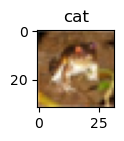

In [22]:
plt.figure(figsize=(1,1))
plt.imshow(x_trian_scaled[0])
plt.title(classes[predicted_cnn[0]])

In [23]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report
print(classification_report(test_y,predicted_cnn))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69      1000
           1       0.77      0.78      0.77      1000
           2       0.49      0.41      0.45      1000
           3       0.48      0.37      0.42      1000
           4       0.51      0.67      0.58      1000
           5       0.58      0.53      0.55      1000
           6       0.68      0.83      0.75      1000
           7       0.73      0.71      0.72      1000
           8       0.83      0.72      0.77      1000
           9       0.73      0.73      0.73      1000

    accuracy                           0.65     10000
   macro avg       0.65      0.65      0.64     10000
weighted avg       0.65      0.65      0.64     10000



In [24]:
test_y[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [25]:
predicted_cnn[:5]

[3, 8, 8, 0, 6]